In [14]:
import pandas as pd
import numpy as np
import netCDF4 as nc
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [108]:
import os
os.environ['PROJ_LIB'] = r'/home/ibrahim/anaconda3/pkgs/proj4-5.2.0- he6710b0_1/share/proj'
from mpl_toolkits.basemap import Basemap

In [11]:
!python3 data_load_script.py

2022-05-04 17:38:58,228 INFO Welcome to the CDS
2022-05-04 17:38:58,229 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2022-05-04 17:38:58,412 INFO Request is completed
2022-05-04 17:38:58,412 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/adaptor.mars.internal-1651630046.1431956-11340-16-ce9a9c4d-2eaa-48d6-9175-091861b7886c.nc to cds_climate.nc (30.7K)
2022-05-04 17:38:58,923 INFO Download rate 60.2K/s                              
2022-05-04 17:38:59,029 INFO Welcome to the CDS
2022-05-04 17:38:59,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/satellite-fire-burned-area
2022-05-04 17:38:59,195 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data6/dataset-satellite-fire-burned-area-dc1bf2a8-7408-41de-b4d4-692b9fbc3db6.zip to BA2017.zip (23.4M)
2022-05-04 17:39:04,741 INFO Download rate 4.2

In [35]:
years = ['2017', '2018', '2019']
listOfFileNames =[]
for year in years:
    with ZipFile('BA{year}.zip'.format(year=year), 'r') as zipObj:
        listOfFileNames+=zipObj.namelist()
        #zipObj.extractall()


In [51]:
listOfFileNames.sort(key=lambda x: int(x[:6]))

In [41]:
def dataloader(variables):
    BA_dataset = []
    for file in listOfFileNames:
        object_netCDF = nc.Dataset(file,'r')
        band_netCDF = object_netCDF.variables
        month_data = []
        for variable in variables:
            month_data.append(np.array(band_netCDF[variable]))
        BA_dataset.append(month_data)
    return np.array(BA_dataset)

In [46]:
object_cds = nc.Dataset("cds_climate.nc","r")
band_cds = object_cds.variables

In [126]:
band_cds

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (9,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (9,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: 
 current shape = (36,)
 filling on, default _FillValue of -2147483647 used,
 'u10': <class 'netCDF4._netCDF4.Variable'>
 int16 u10(time, latitude, longitude)
     scale_factor: 0.00012622853800198052
     add_offset: 2.1092613409922296
     _FillValue: -32767
     missing_value: -32767
     units: m s**-1
     long_name: 10 metre U wind compo

In [123]:
lons_cds = band_cds["longitude"][:]
lats_cds = band_cds["latitude"][:]
time_cds = band_cds["time"]
t2 = band_cds["t2m"][:]
u = band_cds["u10"][:]
v = band_cds["v10"][:]

In [196]:
m = Basemap(projection="merc",llcrnrlon=27.,llcrnrlat=36.,urcrnrlon=30.,urcrnrlat=38.5,resolution="l")

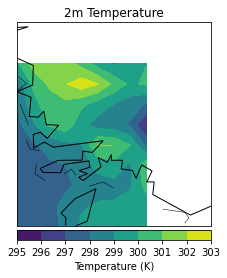

In [197]:
m.drawcoastlines()
m.drawstates()
m.drawcountries()
#m.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
temp = m.contourf(x,y,t2[30,:,:])
cb = m.colorbar(temp,"bottom", size="5%", pad="2%")
plt.title('2m Temperature')
cb.set_label('Temperature (K)')

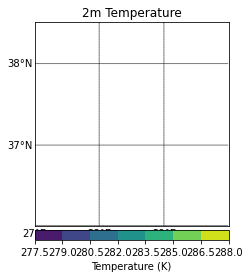

In [177]:
parallels = np.arange(36,38.5,1.) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(27,30,1.) # make longitude lines every 5 degrees from 95W to 70W
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)


In [181]:
#lons,lats= np.meshgrid(lon_cds,lat_cds) # for this dataset, longitude is 0 through 360, so you need to subtract 180 to properly display on map
x,y = m(lon_cds,lat_cds)


In [173]:
lat_cds.shape

(9, 9)

In [162]:
x[:9,:9]

masked_array(
  data=[[     0.   ,  27798.719,  55597.438,  83396.16 , 111194.875,
         138993.6  , 166792.31 , 194591.03 , 222389.75 ],
        [     0.   ,  27798.719,  55597.438,  83396.16 , 111194.875,
         138993.6  , 166792.31 , 194591.03 , 222389.75 ],
        [     0.   ,  27798.719,  55597.438,  83396.16 , 111194.875,
         138993.6  , 166792.31 , 194591.03 , 222389.75 ],
        [     0.   ,  27798.719,  55597.438,  83396.16 , 111194.875,
         138993.6  , 166792.31 , 194591.03 , 222389.75 ],
        [     0.   ,  27798.719,  55597.438,  83396.16 , 111194.875,
         138993.6  , 166792.31 , 194591.03 , 222389.75 ],
        [     0.   ,  27798.719,  55597.438,  83396.16 , 111194.875,
         138993.6  , 166792.31 , 194591.03 , 222389.75 ],
        [     0.   ,  27798.719,  55597.438,  83396.16 , 111194.875,
         138993.6  , 166792.31 , 194591.03 , 222389.75 ],
        [     0.   ,  27798.719,  55597.438,  83396.16 , 111194.875,
         138993.6  , 166792.

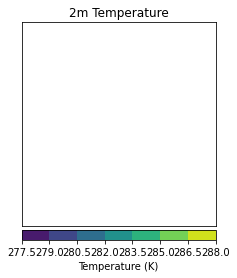

In [176]:
temp = m.contourf(lon_cds,lat_cds,t2[1,:,:])
cb = m.colorbar(temp,"bottom", size="5%", pad="2%")
plt.title('2m Temperature')
cb.set_label('Temperature (K)')

In [49]:
BA_dataset = dataloader(['burned_area','fraction_of_burnable_area','fraction_of_observed_area'])

In [50]:
BA_dataset.shape

(36, 3, 1, 720, 1440)

In [3]:
band_netCDF

{'burned_area': <class 'netCDF4._netCDF4.Variable'>
 float32 burned_area(time, lat, lon)
     long_name: total burned_area
     units: m2
     standard_name: burned_area
     cell_methods: time: sum
 unlimited dimensions: 
 current shape = (1, 720, 1440)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'standard_error': <class 'netCDF4._netCDF4.Variable'>
 float32 standard_error(time, lat, lon)
     long_name: standard error of the estimation of burned area
     units: m2
 unlimited dimensions: 
 current shape = (1, 720, 1440)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'fraction_of_burnable_area': <class 'netCDF4._netCDF4.Variable'>
 float32 fraction_of_burnable_area(time, lat, lon)
     long_name: fraction of burnable area
     units: 1
     comment: The fraction of burnable area is the fraction of the cell that corresponds to vegetated land covers that could burn. The land cover classes are those from CCI Land Cover, http://www.esa-landcover-cci.or

In [4]:
netCDF_array = np.array(band_netCDF["burned_area"])[0]

In [27]:
np.array(band_netCDF["time_bounds"])

array([[18077., 18107.]])

In [8]:
n_zeros = np.count_nonzero(netCDF_array==0)
print(n_zeros)

1020899


In [10]:
mask = np.where(netCDF_array!=0)

In [11]:
netCDF_array[mask]

array([  53664.,   53664., 1663604., ...,  697640.,  268323.,  107329.],
      dtype=float32)

In [17]:
vegetation_class  = np.array(band_netCDF["vegetation_class"])

In [19]:
vegetation_class

array([-2147483647, -2147483647, -2147483647, -2147483647, -2147483647,
       -2147483647, -2147483647, -2147483647, -2147483647, -2147483647,
       -2147483647, -2147483647, -2147483647, -2147483647, -2147483647,
       -2147483647, -2147483647, -2147483647], dtype=int32)

In [20]:
500*500

250000

In [6]:
filepath = "/home/ibrahim/Desktop/wildfire/download.nc"
ds = nc.Dataset(filepath,'r')
ds.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (9,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (9,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: 
 current shape = (36,)
 filling on, default _FillValue of -2147483647 used,
 'u10': <class 'netCDF4._netCDF4.Variable'>
 int16 u10(time, latitude, longitude)
     scale_factor: 0.00012622853800198052
     add_offset: 2.1092613409922296
     _FillValue: -32767
     missing_value: -32767
     units: m s**-1
     long_name: 10 metre U wind compo

In [3]:
import cdsapi

In [2]:
!pip install cdsapi

  Created wheel for cdsapi: filename=cdsapi-0.5.1-py2.py3-none-any.whl size=11702 sha256=56c677c3bc33abf637431be751ef756eb9d3caebc485b5d72011d07b63b66822
  Stored in directory: /home/ibrahim/.cache/pip/wheels/8b/19/90/0f30bd354f0c245f87c1d7639466d05c6b028d3acb4a64cbed
Successfully built cdsapi


In [8]:
a = {"name":{name},"year":{year}}.format(name="a",year="b")
print(a)

NameError: name 'name' is not defined